## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [5]:
"""
Compile 模型
"""
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 122us/step - loss: 1.9201 - accuracy: 0.3049 - val_loss: 1.7364 - val_accuracy: 0.3791
Epoch 2/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.6941 - accuracy: 0.3967 - val_loss: 1.6552 - val_accuracy: 0.4116
Epoch 3/500
50000/50000 [==============================] - 6s 129us/step - loss: 1.6002 - accuracy: 0.4291 - val_loss: 1.5813 - val_accuracy: 0.4334
Epoch 4/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.5393 - accuracy: 0.4498 - val_loss: 1.5077 - val_accuracy: 0.4584
Epoch 5/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.4883 - accuracy: 0.4698 - val_loss: 1.5168 - val_accuracy: 0.4590
Epoch 6/500
50000/50000 [==============================] - 6s 129us/step - loss: 1.4591 - accuracy: 0.4788 - val_loss: 1.4782 - val_accuracy: 0.4741
Epoch 7/500
50000/50000 [==============================]

50000/50000 [==============================] - 6s 121us/step - loss: 0.5450 - accuracy: 0.8052 - val_loss: 1.9456 - val_accuracy: 0.5198
Epoch 56/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.5469 - accuracy: 0.8065 - val_loss: 1.9910 - val_accuracy: 0.5078
Epoch 57/500
50000/50000 [==============================] - 6s 122us/step - loss: 0.5323 - accuracy: 0.8098 - val_loss: 2.0645 - val_accuracy: 0.5118
Epoch 58/500
50000/50000 [==============================] - 6s 122us/step - loss: 0.5178 - accuracy: 0.8157 - val_loss: 2.0993 - val_accuracy: 0.5068
Epoch 59/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.5103 - accuracy: 0.8161 - val_loss: 2.0514 - val_accuracy: 0.5139
Epoch 60/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.5138 - accuracy: 0.8156 - val_loss: 2.0945 - val_accuracy: 0.5029
Epoch 61/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.5046 - accuracy: 0.8195 - val

50000/50000 [==============================] - 6s 117us/step - loss: 0.2409 - accuracy: 0.9130 - val_loss: 3.5994 - val_accuracy: 0.4959
Epoch 110/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.2390 - accuracy: 0.9151 - val_loss: 3.6348 - val_accuracy: 0.5050
Epoch 111/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.2562 - accuracy: 0.9072 - val_loss: 3.4968 - val_accuracy: 0.5048
Epoch 112/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.2448 - accuracy: 0.9120 - val_loss: 3.7252 - val_accuracy: 0.4993
Epoch 113/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.2777 - accuracy: 0.9011 - val_loss: 3.6148 - val_accuracy: 0.4979
Epoch 114/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.2466 - accuracy: 0.9108 - val_loss: 3.6067 - val_accuracy: 0.5069
Epoch 115/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.2209 - accuracy: 0.9218

50000/50000 [==============================] - 6s 117us/step - loss: 0.1906 - accuracy: 0.9318 - val_loss: 4.7506 - val_accuracy: 0.4899
Epoch 164/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.1456 - accuracy: 0.9488 - val_loss: 4.8917 - val_accuracy: 0.5030
Epoch 165/500
50000/50000 [==============================] - 6s 123us/step - loss: 0.1411 - accuracy: 0.9489 - val_loss: 4.8586 - val_accuracy: 0.4964
Epoch 166/500
50000/50000 [==============================] - 6s 125us/step - loss: 0.1551 - accuracy: 0.9449 - val_loss: 4.9374 - val_accuracy: 0.4993
Epoch 167/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.1400 - accuracy: 0.9506 - val_loss: 4.9830 - val_accuracy: 0.4995
Epoch 168/500
50000/50000 [==============================] - 6s 122us/step - loss: 0.1634 - accuracy: 0.9422 - val_loss: 4.9200 - val_accuracy: 0.4980
Epoch 169/500
50000/50000 [==============================] - 6s 123us/step - loss: 0.1471 - accuracy: 0.9487

50000/50000 [==============================] - 6s 118us/step - loss: 0.1800 - accuracy: 0.9377 - val_loss: 5.6941 - val_accuracy: 0.4916
Epoch 218/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.1421 - accuracy: 0.9504 - val_loss: 5.8314 - val_accuracy: 0.4993
Epoch 219/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.1170 - accuracy: 0.9591 - val_loss: 5.7992 - val_accuracy: 0.4857
Epoch 220/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.1065 - accuracy: 0.9630 - val_loss: 5.8753 - val_accuracy: 0.5005
Epoch 221/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.1394 - accuracy: 0.9515 - val_loss: 5.9369 - val_accuracy: 0.4926
Epoch 222/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.1789 - accuracy: 0.9390 - val_loss: 5.6732 - val_accuracy: 0.4926
Epoch 223/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.0904 - accuracy: 0.9687

50000/50000 [==============================] - 6s 116us/step - loss: 0.1501 - accuracy: 0.9495 - val_loss: 6.5397 - val_accuracy: 0.4983
Epoch 272/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.1188 - accuracy: 0.9593 - val_loss: 6.4757 - val_accuracy: 0.4904
Epoch 273/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.0734 - accuracy: 0.9747 - val_loss: 6.5026 - val_accuracy: 0.4974
Epoch 274/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.0376 - accuracy: 0.9874 - val_loss: 6.4552 - val_accuracy: 0.4965
Epoch 275/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.0738 - accuracy: 0.9744 - val_loss: 6.7346 - val_accuracy: 0.4938
Epoch 276/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.2178 - accuracy: 0.9311 - val_loss: 6.6256 - val_accuracy: 0.4972
Epoch 277/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.2174 - accuracy: 0.9301

50000/50000 [==============================] - 6s 116us/step - loss: 0.0691 - accuracy: 0.9763 - val_loss: 7.1036 - val_accuracy: 0.4925
Epoch 326/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.0965 - accuracy: 0.9665 - val_loss: 7.0245 - val_accuracy: 0.4953
Epoch 327/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.1175 - accuracy: 0.9610 - val_loss: 7.0739 - val_accuracy: 0.4893
Epoch 328/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.0908 - accuracy: 0.9699 - val_loss: 6.8513 - val_accuracy: 0.4955
Epoch 329/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.0777 - accuracy: 0.9730 - val_loss: 7.1212 - val_accuracy: 0.4961
Epoch 330/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.1085 - accuracy: 0.9646 - val_loss: 6.9468 - val_accuracy: 0.4951
Epoch 331/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.0599 - accuracy: 0.9792

50000/50000 [==============================] - 6s 116us/step - loss: 0.0038 - accuracy: 0.9998 - val_loss: 7.0141 - val_accuracy: 0.5070
Epoch 380/500
50000/50000 [==============================] - 6s 115us/step - loss: 0.0049 - accuracy: 0.9994 - val_loss: 7.0023 - val_accuracy: 0.5012
Epoch 381/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.6385 - accuracy: 0.8606 - val_loss: 5.6241 - val_accuracy: 0.4859
Epoch 382/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.2290 - accuracy: 0.9279 - val_loss: 5.8748 - val_accuracy: 0.4908
Epoch 383/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.0715 - accuracy: 0.9757 - val_loss: 6.0990 - val_accuracy: 0.4991
Epoch 384/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.0303 - accuracy: 0.9911 - val_loss: 6.2579 - val_accuracy: 0.5029
Epoch 385/500
50000/50000 [==============================] - 6s 115us/step - loss: 0.0193 - accuracy: 0.9952

50000/50000 [==============================] - 6s 116us/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 6.5431 - val_accuracy: 0.5108
Epoch 434/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.0028 - accuracy: 0.9999 - val_loss: 6.6439 - val_accuracy: 0.5101
Epoch 435/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.7591 - accuracy: 0.8257 - val_loss: 4.8511 - val_accuracy: 0.4912
Epoch 436/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.2032 - accuracy: 0.9320 - val_loss: 5.0503 - val_accuracy: 0.5012
Epoch 437/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.0635 - accuracy: 0.9794 - val_loss: 5.2884 - val_accuracy: 0.4978
Epoch 438/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.0354 - accuracy: 0.9903 - val_loss: 5.5134 - val_accuracy: 0.5051
Epoch 439/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.0241 - accuracy: 0.9945

50000/50000 [==============================] - 6s 116us/step - loss: 0.0156 - accuracy: 0.9972 - val_loss: 5.5579 - val_accuracy: 0.5086
Epoch 488/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.0106 - accuracy: 0.9989 - val_loss: 5.7187 - val_accuracy: 0.5095
Epoch 489/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.0079 - accuracy: 0.9993 - val_loss: 5.8748 - val_accuracy: 0.5086
Epoch 490/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.0043 - accuracy: 0.9999 - val_loss: 5.9463 - val_accuracy: 0.5103
Epoch 491/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 6.0437 - val_accuracy: 0.5115
Epoch 492/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 6.1254 - val_accuracy: 0.5112
Epoch 493/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.0023 - accuracy: 1.0000

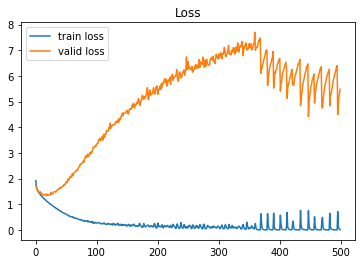

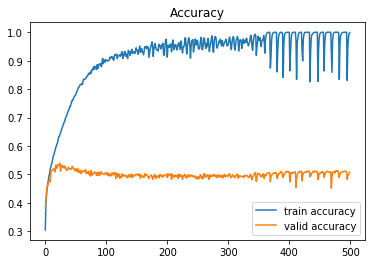

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [8]:
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0078 - accuracy: 0.9998 - val_loss: 5.4797 - val_accuracy: 0.5078
Epoch 2/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0071 - accuracy: 0.9999 - val_loss: 5.4845 - val_accuracy: 0.5074
Epoch 3/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0067 - accuracy: 0.9999 - val_loss: 5.4900 - val_accuracy: 0.5073
Epoch 4/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0064 - accuracy: 0.9999 - val_loss: 5.4956 - val_accuracy: 0.5081
Epoch 5/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0062 - accuracy: 0.9999 - val_loss: 5.5010 - val_accuracy: 0.5082
Epoch 6/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0060 - accuracy: 0.9999 - val_loss: 5.5061 - val_accuracy: 0.5073
Epoch 7/500
50000/50000 [==============================] - 4s 

Epoch 56/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 5.6646 - val_accuracy: 0.5078
Epoch 57/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 5.6670 - val_accuracy: 0.5080
Epoch 58/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 5.6694 - val_accuracy: 0.5079
Epoch 59/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 5.6719 - val_accuracy: 0.5080
Epoch 60/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 5.6743 - val_accuracy: 0.5079
Epoch 61/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 5.6767 - val_accuracy: 0.5080
Epoch 62/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0041 - accuracy: 1.0000

Epoch 111/500
50000/50000 [==============================] - 4s 80us/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 5.7816 - val_accuracy: 0.5083
Epoch 112/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 5.7835 - val_accuracy: 0.5083
Epoch 113/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 5.7854 - val_accuracy: 0.5083
Epoch 114/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 5.7873 - val_accuracy: 0.5084
Epoch 115/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 5.7892 - val_accuracy: 0.5084
Epoch 116/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 5.7911 - val_accuracy: 0.5085
Epoch 117/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0035 - accuracy:

50000/50000 [==============================] - 4s 76us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 5.8769 - val_accuracy: 0.5096
Epoch 166/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 5.8785 - val_accuracy: 0.5097
Epoch 167/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 5.8802 - val_accuracy: 0.5096
Epoch 168/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 5.8818 - val_accuracy: 0.5095
Epoch 169/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 5.8834 - val_accuracy: 0.5094
Epoch 170/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 5.8851 - val_accuracy: 0.5095
Epoch 171/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0032 - accuracy: 1.0000 - val_

Epoch 220/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 5.9618 - val_accuracy: 0.5091
Epoch 221/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 5.9633 - val_accuracy: 0.5091
Epoch 222/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 5.9647 - val_accuracy: 0.5092
Epoch 223/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 5.9662 - val_accuracy: 0.5090
Epoch 224/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 5.9676 - val_accuracy: 0.5089
Epoch 225/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 5.9690 - val_accuracy: 0.5089
Epoch 226/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0029 - accuracy:

50000/50000 [==============================] - 4s 75us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 6.0360 - val_accuracy: 0.5094
Epoch 275/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 6.0373 - val_accuracy: 0.5096
Epoch 276/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 6.0386 - val_accuracy: 0.5094
Epoch 277/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 6.0399 - val_accuracy: 0.5096
Epoch 278/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 6.0412 - val_accuracy: 0.5096
Epoch 279/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 6.0425 - val_accuracy: 0.5096
Epoch 280/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0027 - accuracy: 1.0000 - val_

Epoch 329/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 6.1052 - val_accuracy: 0.5096
Epoch 330/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 6.1064 - val_accuracy: 0.5096
Epoch 331/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 6.1076 - val_accuracy: 0.5097
Epoch 332/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 6.1088 - val_accuracy: 0.5097
Epoch 333/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 6.1100 - val_accuracy: 0.5096
Epoch 334/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 6.1112 - val_accuracy: 0.5096
Epoch 335/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0025 - accuracy:

50000/50000 [==============================] - 4s 75us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 6.1678 - val_accuracy: 0.5093
Epoch 384/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 6.1689 - val_accuracy: 0.5094
Epoch 385/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 6.1700 - val_accuracy: 0.5095
Epoch 386/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 6.1711 - val_accuracy: 0.5094
Epoch 387/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 6.1722 - val_accuracy: 0.5095
Epoch 388/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 6.1733 - val_accuracy: 0.5095
Epoch 389/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0023 - accuracy: 1.0000 - val_

Epoch 438/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 6.2269 - val_accuracy: 0.5093
Epoch 439/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 6.2279 - val_accuracy: 0.5094
Epoch 440/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 6.2289 - val_accuracy: 0.5093
Epoch 441/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 6.2300 - val_accuracy: 0.5093
Epoch 442/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 6.2310 - val_accuracy: 0.5094
Epoch 443/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 6.2320 - val_accuracy: 0.5093
Epoch 444/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0022 - accuracy:

50000/50000 [==============================] - 4s 75us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 6.2811 - val_accuracy: 0.5092
Epoch 493/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 6.2821 - val_accuracy: 0.5093
Epoch 494/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 6.2831 - val_accuracy: 0.5092
Epoch 495/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 6.2840 - val_accuracy: 0.5092
Epoch 496/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 6.2850 - val_accuracy: 0.5092
Epoch 497/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 6.2860 - val_accuracy: 0.5092
Epoch 498/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.0021 - accuracy: 1.0000 - val_

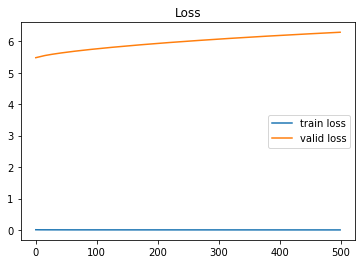

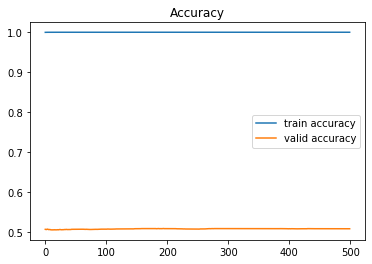

In [9]:
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()